<a href="https://colab.research.google.com/github/RaczeQ/networkx-library-workshop/blob/master/notebooks/NetworkX_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load files

In [0]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import collections
from operator import itemgetter

import networkx as nx

## NetworkX Methods

### Loading network

Adjacency list - `nx.read_adjlist(path, comments='#')`

Edge list - `nx.read_edgelist(path, comments='#')`

### Generating network

Complete - `nx.complete_graph(nodes)`

Balanced tree - `nx.balanced_tree(branching_factor, height)`

Erdős-Rényi  - `nx.erdos_renyi_graph(nodes, probability, seed=None, directed=False)`

Barabási–Albert - `barabasi_albert_graph(nodes, edges_from_node, seed=None)`

### Measures

Betweenness - `nx.betweenness_centrality(graph)`

Closeness - `nx.closeness_centrality(graph)`

Clustering coefficient - `nx.clustering(graph)`

Degree - `nx.degree(graph)`

Density - `nx.betweenness_centrality(graph)`

Diameter - `nx.diameter(graph)` 
(Caution: unconnected graph raises exception)

Number of connected components - `nx.number_connected_components(graph)`

Pagerank - `nx.pagerank(graph)`

Shortest path length - `nx.average_shortest_path_length(graph)`

### Manipulating network

Add node - `graph.add_node(node)`

Add nodes - `graph.add_nodes_from([node1, node2, ...])` / `graph.add_nodes_from(range(1,100))`

Add edge - `graph.add_edge(node1, node2)`

Attributes:

```
>>> graph.add_node(node, attribute_name=value, time=5, weather="sunny")
>>> graph.nodes[node][attibute_name]
value
>>> del graph.nodes[node][attibute_name]
>>> graph.nodes[node]
{ "time": 5, "weather": "sunny"}
```



In [66]:
barabasi = nx.barabasi_albert_graph(100, 5)
print(nx.info(barabasi))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


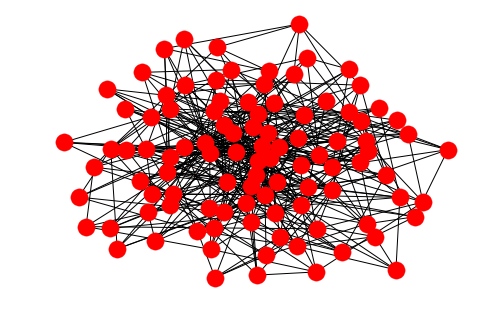

In [67]:
nx.draw(barabasi)

In [81]:
degree = nx.degree(barabasi)
print(degree)

[(0, 11), (1, 9), (2, 9), (3, 16), (4, 30), (5, 24), (6, 23), (7, 35), (8, 30), (9, 27), (10, 17), (11, 16), (12, 30), (13, 10), (14, 12), (15, 14), (16, 12), (17, 13), (18, 10), (19, 11), (20, 8), (21, 12), (22, 9), (23, 9), (24, 13), (25, 16), (26, 11), (27, 12), (28, 13), (29, 8), (30, 12), (31, 12), (32, 6), (33, 7), (34, 7), (35, 7), (36, 9), (37, 12), (38, 12), (39, 10), (40, 12), (41, 6), (42, 9), (43, 5), (44, 11), (45, 9), (46, 6), (47, 7), (48, 7), (49, 11), (50, 5), (51, 6), (52, 10), (53, 7), (54, 9), (55, 6), (56, 7), (57, 8), (58, 7), (59, 8), (60, 6), (61, 8), (62, 6), (63, 5), (64, 11), (65, 6), (66, 8), (67, 6), (68, 6), (69, 6), (70, 6), (71, 6), (72, 6), (73, 6), (74, 6), (75, 6), (76, 6), (77, 5), (78, 5), (79, 6), (80, 5), (81, 6), (82, 5), (83, 5), (84, 5), (85, 6), (86, 5), (87, 6), (88, 5), (89, 5), (90, 5), (91, 5), (92, 5), (93, 6), (94, 5), (95, 5), (96, 5), (97, 5), (98, 5), (99, 5)]


In [82]:
average_degree = np.mean([d for n,d in degree])
print(average_degree)

9.5


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


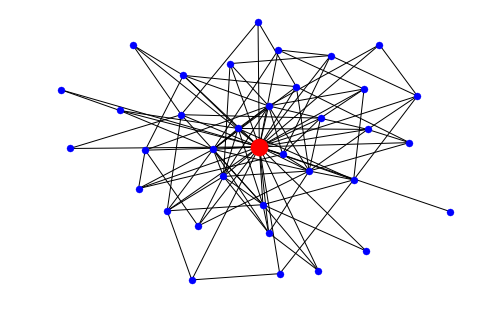

In [83]:
(largest_hub, d) = sorted(degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(barabasi, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

<BarContainer object of 17 artists>

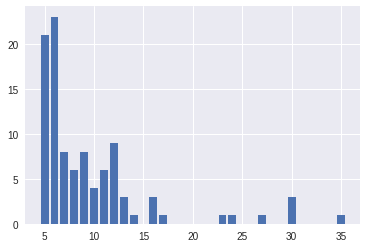

In [84]:
degree_sequence = sorted([d for n, d in degree], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt)

In [0]:
jazz_graph = nx.read_adjlist('jazz', comments='%')

In [87]:
print(nx.info(jazz_graph))

Name: 
Type: Graph
Number of nodes: 198
Number of edges: 2742
Average degree:  27.6970


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


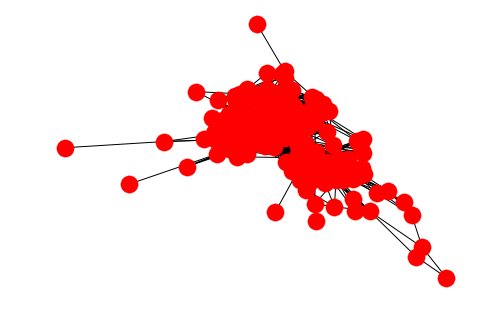

In [86]:
nx.draw(jazz_graph)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


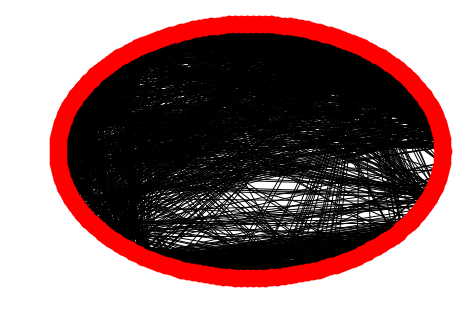

In [90]:
nx.draw_circular(jazz_graph)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


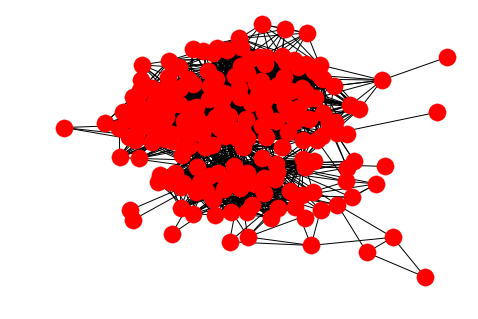

In [94]:
nx.draw_kamada_kawai(jazz_graph)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


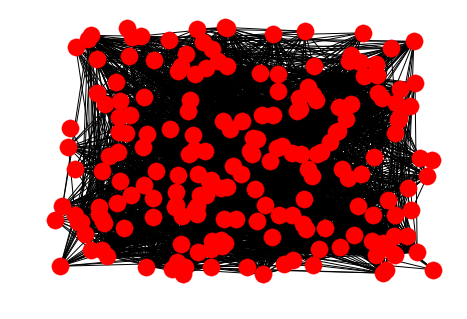

In [98]:
nx.draw_random(jazz_graph)

In [88]:
degree = nx.degree(jazz_graph)
print(degree)

[('1', 23), ('10', 42), ('11', 40), ('12', 46), ('13', 60), ('14', 49), ('15', 49), ('16', 23), ('17', 20), ('18', 60), ('19', 56), ('2', 21), ('20', 75), ('21', 43), ('22', 10), ('23', 74), ('24', 45), ('3', 29), ('4', 43), ('5', 12), ('6', 23), ('7', 96), ('8', 20), ('9', 26), ('120', 17), ('121', 43), ('122', 41), ('123', 39), ('124', 31), ('125', 52), ('67', 100), ('130', 19), ('145', 8), ('146', 9), ('147', 8), ('148', 24), ('149', 48), ('150', 38), ('157', 11), ('159', 29), ('160', 25), ('101', 55), ('112', 48), ('128', 41), ('133', 51), ('137', 46), ('152', 30), ('164', 39), ('165', 40), ('166', 34), ('167', 34), ('168', 37), ('169', 32), ('170', 31), ('171', 32), ('172', 33), ('173', 34), ('174', 33), ('177', 14), ('178', 14), ('179', 18), ('153', 27), ('155', 39), ('100', 44), ('102', 31), ('103', 29), ('104', 23), ('105', 35), ('106', 23), ('107', 27), ('108', 23), ('109', 59), ('110', 31), ('111', 53), ('116', 27), ('117', 55), ('118', 28), ('119', 46), ('127', 13), ('138', 

In [54]:
average_degree = np.mean([d for n,d in degree])
print(average_degree)

27.696969696969695


<BarContainer object of 62 artists>

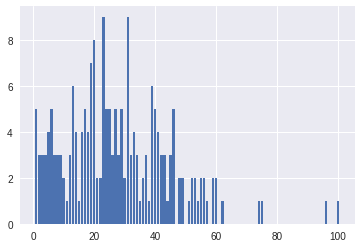

In [91]:
degree_sequence = sorted([d for n, d in degree], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt)

In [56]:
betweenness = nx.betweenness_centrality(jazz_graph)
print(betweenness)

{'1': 0.000851342222753862, '10': 0.013289336862047309, '11': 0.004313951504203767, '12': 0.0034177056601804854, '13': 0.01407907557385525, '14': 0.004380981675579163, '15': 0.004792559595517549, '16': 0.002018648490290283, '17': 0.0018039443649464706, '18': 0.009455168971331605, '19': 0.008640471063891916, '2': 0.0005763956613445939, '20': 0.017638257970617546, '21': 0.002207951859421836, '22': 0.000687091522571601, '23': 0.03960002124911093, '24': 0.00624230305403988, '3': 0.006628843999510171, '4': 0.002207951859421836, '5': 0.0008563381619116215, '6': 0.0008049075549189744, '7': 0.057538917986120146, '8': 0.001435756058631026, '9': 0.004031837519016956, '120': 0.0005919700809628333, '121': 0.0057962894806967424, '122': 0.009338368742625251, '123': 0.00712743976648565, '124': 0.0029765031418601184, '125': 0.01766588737089527, '67': 0.15105615373941586, '130': 0.005193766161005843, '145': 1.2725757960400039e-05, '146': 5.5010340672829014e-05, '147': 1.2725757960400039e-05, '148': 0.0

In [57]:
average_betweenness = np.mean([b for d,b in betweenness.items()])
print(average_betweenness)

0.006301228382446656


In [103]:
pagerank = nx.pagerank(jazz_graph)
print(pagerank)
print('Max pagerank:', sorted([p for n, p in pagerank.items()], reverse=True)[0])

{'1': 0.004054274378673574, '10': 0.006862707924183666, '11': 0.006348121073056098, '12': 0.007042873280094578, '13': 0.009252881141315877, '14': 0.007526997296145854, '15': 0.007525209268080119, '16': 0.004096604727493827, '17': 0.003948478855530476, '18': 0.009060762038158074, '19': 0.008477095263097457, '2': 0.003629854939089149, '20': 0.011216290798180817, '21': 0.006771035514800392, '22': 0.0023280777780608723, '23': 0.011461609126898618, '24': 0.007112614875989314, '3': 0.005209316576796491, '4': 0.006771035514800392, '5': 0.0025503283665934537, '6': 0.00402055427111106, '7': 0.0145479567746197, '8': 0.0036687876924427435, '9': 0.004665455240792083, '120': 0.0031520212674609684, '121': 0.006692238260507386, '122': 0.006913305548546279, '123': 0.006565244504702942, '124': 0.005251047446745982, '125': 0.008412364075460537, '67': 0.016575536080634494, '130': 0.0039476268042185425, '145': 0.0020950809239109044, '146': 0.0022570247261652424, '147': 0.0020950809239109044, '148': 0.0046